In [54]:
print("Hello world!!")

Hello world!!


In [55]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [56]:
df = pd.read_csv("/Users/developer/Documents/Current Project/Python/Dataset/Retail and wherehouse Sale.csv")
df

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
...,...,...,...,...,...,...,...,...,...
29995,2020,3,"THE COUNTRY VINTNER, LLC DBA WINEBOW",352322,FORTALEZA ANEJO TEQUILA - 750ML,LIQUOR,0.33,0.0,0.0
29996,2020,3,OSLO ENTERPRISE,352324,DOMAINE BRICHOT BLANC - 750ML,WINE,0.00,0.0,0.0
29997,2020,3,OPICI FAMILY DISTRIBUTING OF MD,352354,LOTE 44 MALBEC - 750ML,WINE,0.00,0.0,6.0
29998,2020,3,CAMPARI AMERICA LLC,35238,SKYY VODKA - 1.75L,LIQUOR,329.04,302.0,0.0


In [57]:
df.isnull().sum()

YEAR                 0
MONTH                0
SUPPLIER            33
ITEM CODE            0
ITEM DESCRIPTION     0
ITEM TYPE            0
RETAIL SALES         1
RETAIL TRANSFERS     0
WAREHOUSE SALES      0
dtype: int64

In [58]:
dfMod = df.dropna()

In [59]:
dfMod.shape

(29967, 9)

In [60]:
dfMod.isnull().sum()

YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

In [61]:
dfMod.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,29967.0,29967.000000,29967.000000,29967.000000,29967.000000
mean,2020.0,3.911403,6.814945,6.597148,27.506121
std,0.0,2.836790,28.750487,27.893590,272.242434
min,2020.0,1.000000,-0.420000,-6.000000,-3999.000000
25%,2020.0,1.000000,0.000000,0.000000,0.000000
50%,2020.0,3.000000,0.160000,0.000000,1.000000
75%,2020.0,7.000000,2.910000,3.000000,6.000000
max,2020.0,9.000000,1482.170000,1507.000000,18317.000000


In [62]:
dfMod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29967 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              29967 non-null  int64  
 1   MONTH             29967 non-null  int64  
 2   SUPPLIER          29967 non-null  object 
 3   ITEM CODE         29967 non-null  object 
 4   ITEM DESCRIPTION  29967 non-null  object 
 5   ITEM TYPE         29967 non-null  object 
 6   RETAIL SALES      29967 non-null  float64
 7   RETAIL TRANSFERS  29967 non-null  float64
 8   WAREHOUSE SALES   29967 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.3+ MB


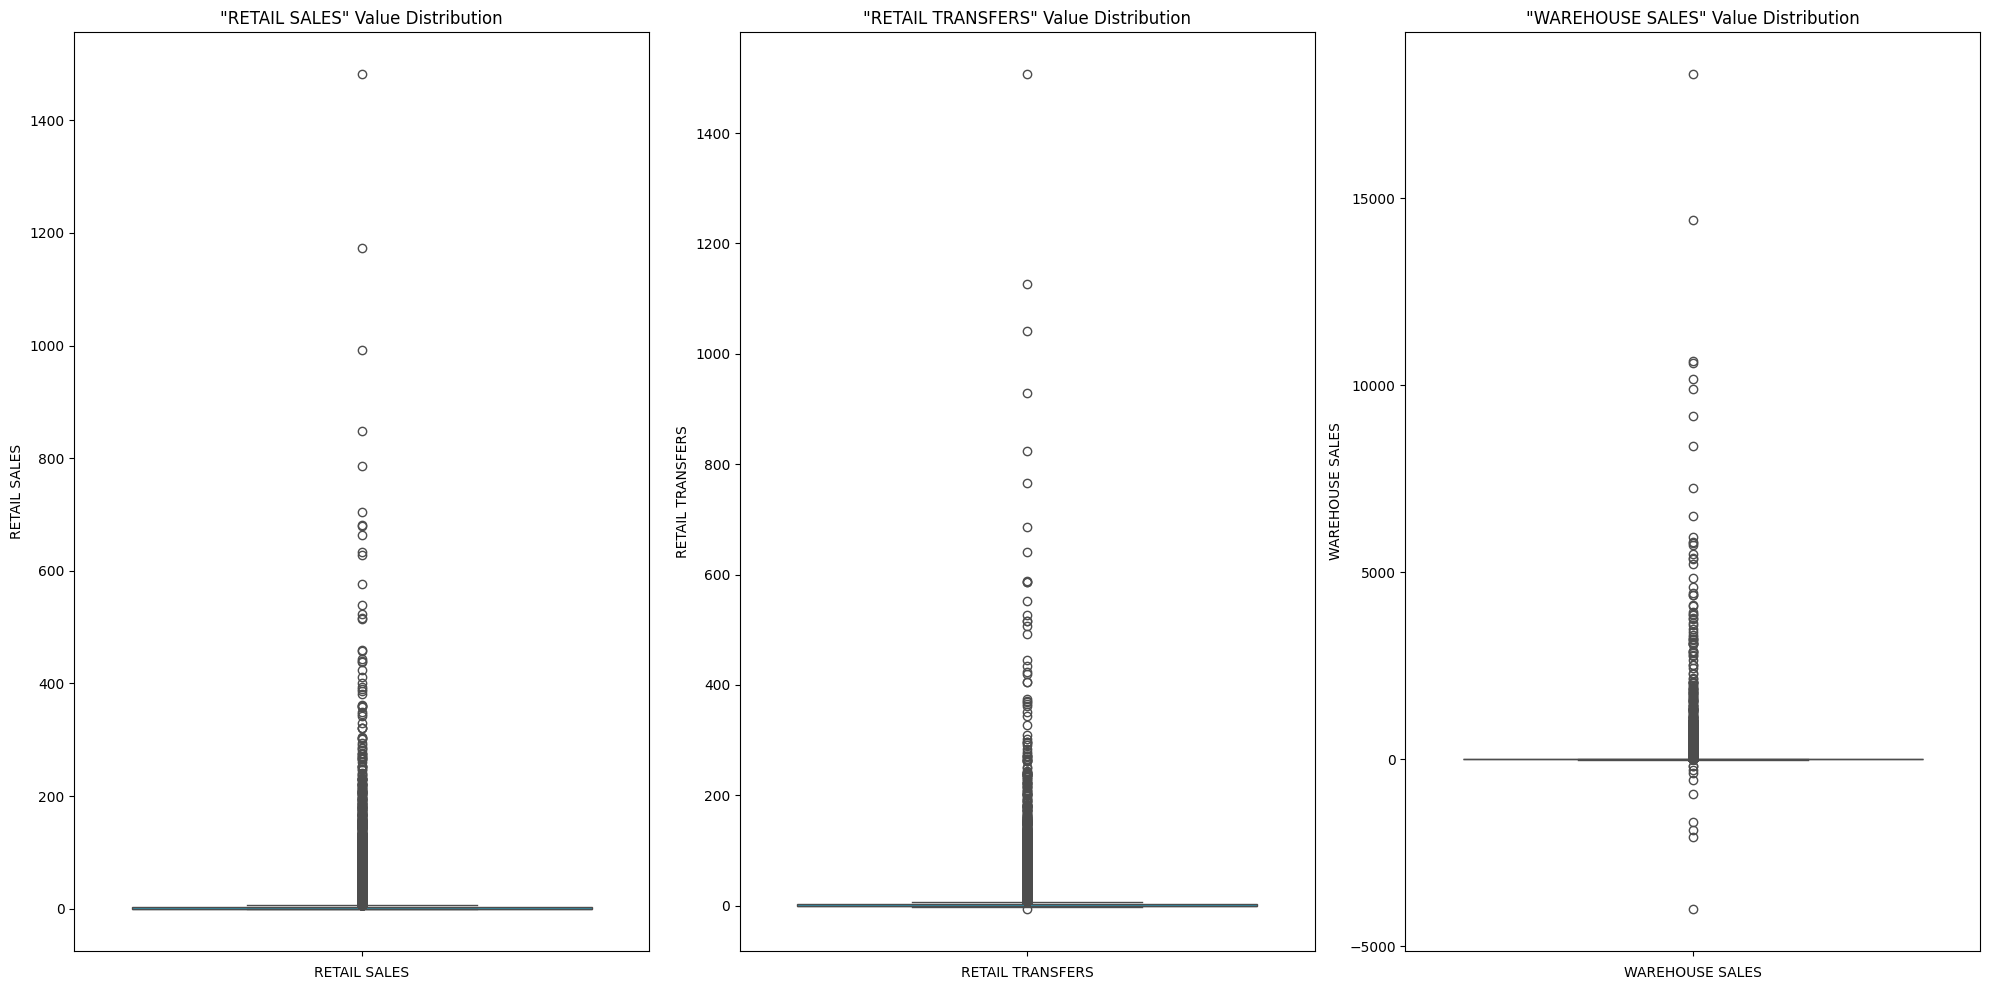

In [63]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.boxplot(dfMod['RETAIL SALES'], color="#00C8FF")
plt.title("\"RETAIL SALES\" Value Distribution")
plt.xlabel("RETAIL SALES")

plt.subplot(1,3,2)
sns.boxplot(dfMod['RETAIL TRANSFERS'], color="#00C8FF")
plt.title("\"RETAIL TRANSFERS\" Value Distribution")
plt.xlabel("RETAIL TRANSFERS")

plt.subplot(1,3,3)
sns.boxplot(dfMod['WAREHOUSE SALES'], color="#00C8FF")
plt.title("\"WAREHOUSE SALES\" Value Distribution")
plt.xlabel("WAREHOUSE SALES")

plt.tight_layout()
plt.show()

In [64]:
dfMod[(dfMod['RETAIL SALES']==0)].shape

(13682, 9)

In [65]:
agg_df = dfMod.groupby('SUPPLIER').agg(
    sum_Retail_Sales = ('RETAIL SALES', 'sum'),
    sum_Warehouse_Sales = ("WAREHOUSE SALES", 'sum')
)

In [66]:
agg_df.sort_values(ascending=False, by="sum_Retail_Sales")

,sum_Retail_Sales,sum_Warehouse_Sales
SUPPLIER,,
DIAGEO NORTH AMERICA INC,13840.54,20807.36
E & J GALLO WINERY,12742.24,17734.00
ANHEUSER BUSCH INC,10091.64,137538.52
CONSTELLATION BRANDS,9931.78,11193.01
JIM BEAM BRANDS CO,9845.79,757.76
...,...,...
THE RIVER WINE,0.00,25.00
HAMCO DC,0.00,0.00
THE WINE SOURCE INC,0.00,52.00


In [67]:
agg_df.sort_values(ascending=False, by="sum_Warehouse_Sales")

,sum_Retail_Sales,sum_Warehouse_Sales
SUPPLIER,,
CROWN IMPORTS,9341.80,183092.82
ANHEUSER BUSCH INC,10091.64,137538.52
MILLER BREWING COMPANY,7737.55,125280.03
HEINEKEN USA,5670.53,92198.17
BOSTON BEER CORPORATION,5812.10,33256.93
...,...,...
SOVEREIGN BRANDS LLC,32.01,0.00
SNR HOLDINGS LLC,0.64,0.00
SMT AQUISITIONS LLC,0.57,0.00


In [68]:
agg_df_Momsales = dfMod.groupby('MONTH').agg(
    monthy_retail_sales = ("RETAIL SALES", "sum"),
    monthy_retail_transfers = ("RETAIL TRANSFERS", "sum"),
    monthy_warehouse_sales = ("WAREHOUSE SALES", "sum")
)

In [69]:
agg_df_Momsales

,monthy_retail_sales,monthy_retail_transfers,monthy_warehouse_sales
MONTH,,,
1,73731.60,75931.35,285231.72
3,33920.24,34485.08,113307.22
7,91766.60,82667.57,418320.42
9,4805.02,4612.74,7416.57


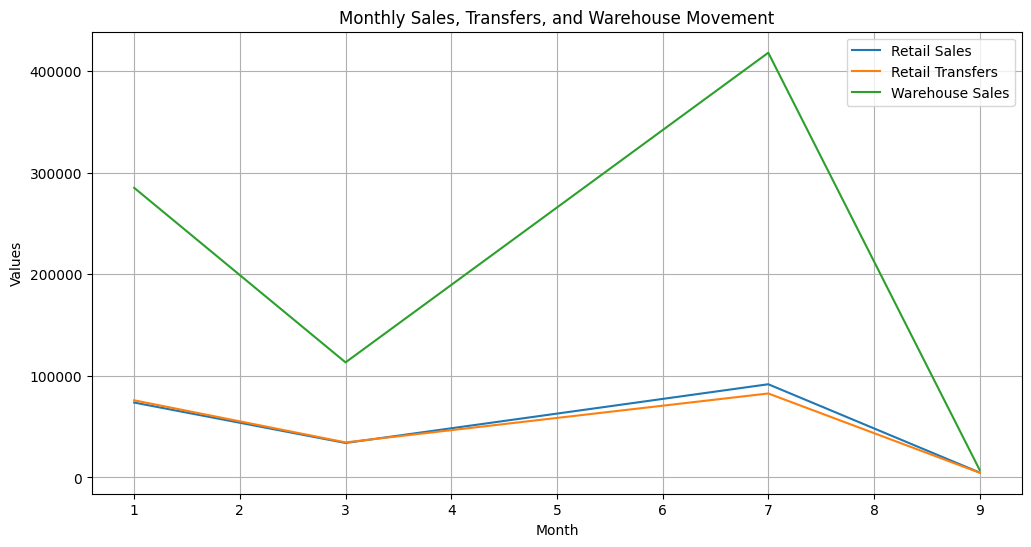

In [70]:
agg_df_Momsales = agg_df_Momsales.sort_index()

plt.figure(figsize=(12, 6))

plt.plot(agg_df_Momsales.index, agg_df_Momsales['monthy_retail_sales'], label='Retail Sales')
plt.plot(agg_df_Momsales.index, agg_df_Momsales['monthy_retail_transfers'], label='Retail Transfers')
plt.plot(agg_df_Momsales.index, agg_df_Momsales['monthy_warehouse_sales'], label='Warehouse Sales')

plt.title('Monthly Sales, Transfers, and Warehouse Movement')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# <b>Supplier Analysis

In [78]:
supplier_agg = dfMod.groupby('SUPPLIER').agg(
    total_retail_sales = ("RETAIL SALES", "sum"),
    total_retail_transfers = ("RETAIL TRANSFERS", "sum"),
    total_warehouse_sales = ("WAREHOUSE SALES", "sum")
)

In [79]:
supplier_agg['transfer_ratio'] = supplier_agg['total_retail_transfers'] / supplier_agg['total_warehouse_sales']

In [80]:
supplier_agg

,total_retail_sales,total_retail_transfers,total_warehouse_sales,transfer_ratio
SUPPLIER,,,,
A I G WINE & SPIRITS,0.00,0.0,26.00,0.000000
ADAMBA IMPORTS INTL,6.07,6.0,1.00,6.000000
AIKO IMPORTERS INC,0.08,0.0,1.00,0.000000
ALLAGASH BREWING COMPANY,61.65,62.0,847.00,0.073200
ALLIED IMPORTERS USA LTD,0.00,1.0,1.00,1.000000
...,...,...,...,...
WINERY EXCHANGE INC,0.08,0.0,22.00,0.000000
YOUNG WON TRADING INC,507.32,509.0,842.95,0.603832
YUENGLING BREWERY,2734.59,2670.0,14206.84,0.187938


In [82]:
supplier_agg.sort_values(ascending=False, by='total_retail_sales')

,total_retail_sales,total_retail_transfers,total_warehouse_sales,transfer_ratio
SUPPLIER,,,,
DIAGEO NORTH AMERICA INC,13840.54,13245.98,20807.36,0.636601
E & J GALLO WINERY,12742.24,11970.41,17734.00,0.674998
ANHEUSER BUSCH INC,10091.64,9344.50,137538.52,0.067941
CONSTELLATION BRANDS,9931.78,9467.82,11193.01,0.845869
JIM BEAM BRANDS CO,9845.79,9640.19,757.76,12.721957
...,...,...,...,...
THE RIVER WINE,0.00,0.00,25.00,0.000000
HAMCO DC,0.00,56.00,0.00,inf
THE WINE SOURCE INC,0.00,0.00,52.00,0.000000


In [83]:
supplier_agg.sort_values(ascending=False, by='total_retail_transfers')

,total_retail_sales,total_retail_transfers,total_warehouse_sales,transfer_ratio
SUPPLIER,,,,
DIAGEO NORTH AMERICA INC,13840.54,13245.98,20807.36,0.636601
E & J GALLO WINERY,12742.24,11970.41,17734.00,0.674998
JIM BEAM BRANDS CO,9845.79,9640.19,757.76,12.721957
CONSTELLATION BRANDS,9931.78,9467.82,11193.01,0.845869
ANHEUSER BUSCH INC,10091.64,9344.50,137538.52,0.067941
...,...,...,...,...
THE RIVER WINE,0.00,0.00,25.00,0.000000
LEGACY PARTNERS DISTRIBUTION LLC,3.06,0.00,0.00,NaN
THE SPANISH WINE IMPORTERS LLC,0.33,0.00,52.00,0.000000


In [85]:
supplier_agg.sort_values(ascending=False, by='total_warehouse_sales')

,total_retail_sales,total_retail_transfers,total_warehouse_sales,transfer_ratio
SUPPLIER,,,,
CROWN IMPORTS,9341.80,8899.0,183092.82,0.048604
ANHEUSER BUSCH INC,10091.64,9344.5,137538.52,0.067941
MILLER BREWING COMPANY,7737.55,6888.5,125280.03,0.054985
HEINEKEN USA,5670.53,5329.5,92198.17,0.057805
BOSTON BEER CORPORATION,5812.10,5437.0,33256.93,0.163485
...,...,...,...,...
SOVEREIGN BRANDS LLC,32.01,56.0,0.00,inf
SNR HOLDINGS LLC,0.64,0.0,0.00,NaN
SMT AQUISITIONS LLC,0.57,0.0,0.00,NaN


In [86]:
supplier_agg.sort_values(ascending=False, by='transfer_ratio')

,total_retail_sales,total_retail_transfers,total_warehouse_sales,transfer_ratio
SUPPLIER,,,,
ZURENA LLC,4.50,1.0,0.0,inf
CARROLL CREEK WHISKEY LLC,35.63,38.0,0.0,inf
MEXCOR INTERNATIONAL,12.75,20.0,0.0,inf
BITTERMILK LLC,54.76,27.0,0.0,inf
MCNEILL INDEPENDENT SPIRIT CREATORS LLC,31.96,27.0,0.0,inf
...,...,...,...,...
SUGARLOAF MOUNTAIN VINEYARD LLC,1.60,0.0,0.0,NaN
TRUE RESPITE BREWING COMPANY LLC,143.83,0.0,0.0,NaN
VINIFERA DISTRIBUTING OF MARYLAND INC,0.08,0.0,0.0,NaN
